<a href="https://colab.research.google.com/github/teo-evelin/QUIMICA/blob/main/Termodin%C3%A1mica_vs_cin%C3%A9tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad:

(1) Calcular la energía de activación de la reacción química de isomerización del ácido fórmico (cis --> trans)

(2) Calcular el tipo de reacción: endotérmica / exotérmica

# CINÉTICA Y TERMODINÁMICA
---


In [ ]:
  %%capture
  !pip install rdkit
  !pip install pyscf
  !pip install rdkit pyscf
  !pip install py3Dmol
  !pip install --upgrade py3Dmol

In [ ]:
# Importamos librerías
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf

### ESTRUCTURA

- Cis

In [ ]:
# representación SMILES del isómero CIS
smi_cis = "O=CO"
# elemento de RDKit
cis = Chem.MolFromSmiles(smi_cis)
# agregamos sus hidrógenos
cis = Chem.AddHs(cis)
# etiquetamos sus átomos y generamos sus coordenadas usando una semilla
Chem.AllChem.EmbedMolecule(cis, useRandomCoords=False,randomSeed=1234)
# guardamos a un archivo XYZ
Chem.MolToXYZFile(cis, "cis.xyz")

In [ ]:
!cat cis.xyz

- Trans

In [ ]:
smi_trans = "O=CO"
trans = Chem.MolFromSmiles(smi_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=1234)
Chem.MolToXYZFile(trans, "trans.xyz")

In [ ]:
trans

In [ ]:
!cat trans.xyz

- Diedro

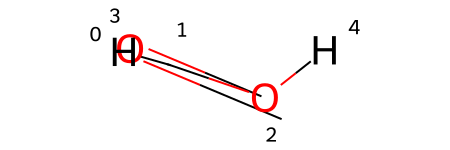

In [ ]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "diedro90.xyz")
cis

In [ ]:
!cat diedro90.xyz

CALCULO DE ENERGIA

- CIS

In [ ]:
cis = gto.M(atom="cis.xyz")

In [ ]:
cis.basis = "6-31G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

In [ ]:
resultado_cis = mf_cis.kernel()
resultado_cis

converged SCF energy = -187.129033059614


-187.12903305961413

- DIEDRO

In [ ]:
cis_90 = gto.M(atom="diedro90.xyz")

In [ ]:
cis_90.basis = "6-31G"
mf_90 = cis_90.KS()
mf_90.xc = 'b3lyp'

In [ ]:
resultado_cis_90 = mf_90.kernel()
resultado_cis_90

converged SCF energy = -187.113091366987


-187.11309136698708

- TRANS

In [ ]:
trans = gto.M(atom="trans.xyz")

In [ ]:
trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [ ]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -187.129033059614


-187.1290330596144


# Cinética
```
Calcular la energía de activación
```

In [ ]:
E_activacion = resultado_cis_90 - resultado_cis
E_activacion

# Termodinámica

```
 Calcular el tipo de reacción
```



In [ ]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es exotérmica
